-------------- Batch Gradient Descent Result --------------
alpha: 0.001 , epoch: 350
theta: [[ 0.64271605  0.94893373 -0.17647986]]
mse: 0.13936199153678966
r-square: 0.7212760169264207


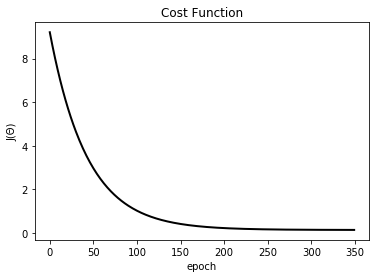

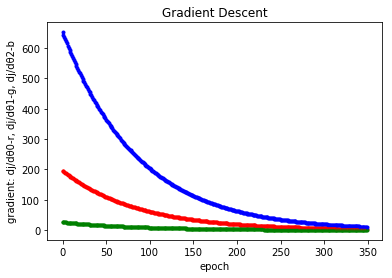

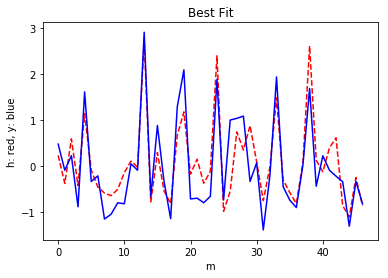

-------------- Stochastic Gradient Descent Result --------------
alpha: 0.01 , epoch: 47
theta: [[ 0.62406993  0.93975344 -0.21969425]]
mse: 0.14050171830823813
r-square: 0.7189965633835238


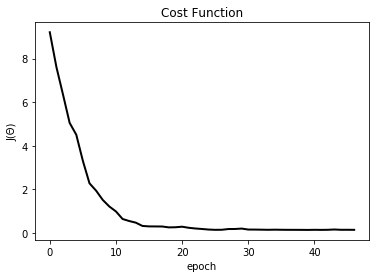

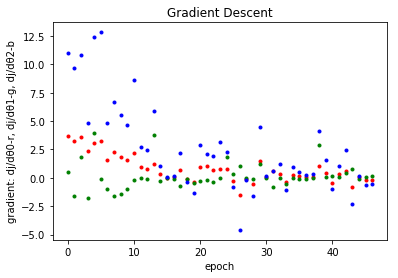

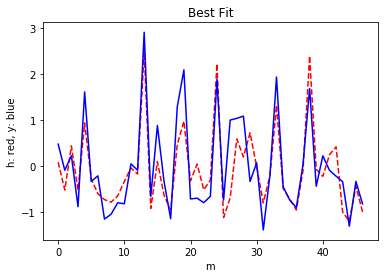

-------------- sklearn Linear Regression Result --------------
theta: [    0.           139.21067402 -8738.01911233]
bias: 89597.9095428
r-square: 0.732945018029


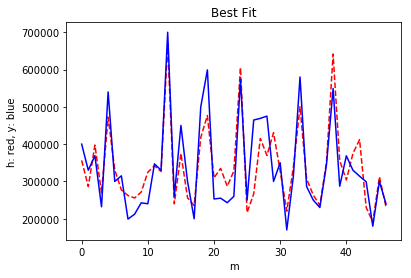

-------------- Normal Equition Result --------------
####no feature scaling####
theta: [[ 89597.9095428     139.21067402  -8738.01911233]]
mse: 2043280050.602828
r-square: 0.7329450180289143

####feature scaling#####
theta: [[ 0.22393542  0.88476599 -0.07063735]]
mse: 0.13352749098554284
r-square: 0.7329450180289143


In [1]:
'''
Created on March 26, 2017
Linear Regression - Boston House Price
@author: Cyrano
'''
import numpy as np
import matplotlib.pyplot as plt

# 载入数据集
def loadDataSet():
    dataMat = []; labelMat = []
    
    fr = open('input/Linear/ex1x.txt')
    for line in fr.readlines():
        x = line.strip().split()
        dataMat.append([float(1), float(x[0]), float(x[1])])
        
    fr = open('input/Linear/ex1y.txt')
    for line in fr.readlines():
        y = line.strip().split()  
        labelMat.append(float(y[0]))
        
    return dataMat,labelMat
  
# 特征缩放 - 调节比例
def featureRescaling(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].min())/(mat[:,col].max()-mat[:,col].min()) 
    return mat

# 特征缩放 - 标准化
def featureStandardization(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].mean())/mat[:,col].std()
    return mat

# 代价函数计算
def Cost(x_mat,y_mat,weights):
    error = x_mat * np.mat(weights) - y_mat
    cost = float(np.sum(pow(error.getA(), 2), axis = 0)) / (2*m)
    return cost

# 计算r-square
def rSquare(x_mat, y_mat, weights):
    y_hat= x_mat * np.mat(weights)
    sse = float(np.sum(pow((y_mat-y_hat).getA(), 2)))
    sst = float(y_mat.var()*m)  
    return 1 - sse / sst

# 批量梯度下降
def batchGradDescent(x_mat,y_mat,alpha,maxCycles):
    weights = np.ones((n,1))
    
    for i in range(maxCycles):
        h = x_mat * np.mat(weights)
        error = h - y_mat
        cost = Cost(x_mat, y_mat, weights)
        gradient = x_mat.transpose() * error
        weights = weights - alpha / m * x_mat.transpose() * error
        
        all_grad.append(gradient.tolist())
        all_weight.append(weights.tolist())
        all_cost.append(cost)
    
    return weights

# 随机梯度下降
def stocGradDescent(x_mat,y_mat,alpha):
    weights = np.ones((n,1))
    
    for i in range(m):
        h= x_mat[i,:] * np.mat(weights)
        error = h - y_mat[i,0]       
        cost = Cost(x_mat, y_mat, weights)
        gradient = x_mat[i,:].transpose() * error
        weights = weights - alpha * x_mat[i,:].transpose()*error 
        
        all_grad.append(gradient.tolist())
        all_weight.append(weights.tolist())
        all_cost.append(cost)
        
    return weights

# 线性逼近
def normalEquition(x_mat, y_mat):
    B = np.linalg.inv(x_mat.transpose() * x_mat)
    weights = B * x_mat.transpose() * y_mat
    return weights

# 绘制代价函数示意图
def plotCost(all_cost):
    plt.plot(all_cost,'k-', label='line 1', linewidth=2)
    plt.ylabel("J(Θ)")
    plt.xlabel("epoch")
    plt.title("Cost Function")
    plt.show()
    
# 绘制梯度下降示意图
def plotGrad(all_grad):
    for i in range(len(all_grad)):
        plt.plot(i,(np.mat(all_grad[i]))[0],'r.')
        plt.plot(i,(np.mat(all_grad[i]))[1],'g.')
        plt.plot(i,(np.mat(all_grad[i]))[2],'b.')
      
    plt.ylabel("gradient: dj/dθ0-r, dj/dθ1-g, dj/dθ2-b")
    plt.xlabel("epoch")   
    plt.title("Gradient Descent")    
    plt.show()

# 绘制权重变化示意图
def plotWeight(all_weight):
    for i in range(len(all_weight)):
        plt.plot(i,(np.mat(all_weight[i]))[0],'r,')
        plt.plot(i,(np.mat(all_weight[i]))[1],'g,')
        plt.plot(i,(np.mat(all_weight[i]))[2],'b,')
      
    plt.ylabel("theta")
    plt.xlabel("epoch")   
    plt.title("Theta Matrix")     
    plt.show()
    
# 绘制最佳拟合曲线
def plotBestFit(weights):
    h = x_mat * np.mat(weights)
    plt.plot(h,'r--')
    plt.plot(y_mat,'b-')
    plt.ylabel("h: red, y: blue")
    plt.xlabel("m")
    plt.title("Best Fit")     
    plt.show()
    
  
###########################  
  
x, y = loadDataSet()

# 特征缩放 调节比例
#x_mat = featureRescaling(np.mat(x), 1)
#y_mat = featureRescaling(np.mat(y).transpose(),0)

# 特征缩放 标准化
x_mat = featureStandardization(np.mat(x), 1)
y_mat = featureStandardization(np.mat(y).transpose(),0)

m,n = np.shape(x_mat)

#all_y_hat_fs = []
#
#all_result_fs = []
#all_result_no_fs = []

#print("x vectors:")
#print(x_mat)
#print("y vectors:")
#print(y_mat)

print("-------------- Batch Gradient Descent Result --------------")
alpha = 0.001
epoch = 350

all_grad = []
all_weight = []
all_cost = []

print("alpha: " + str(alpha) + " , epoch: "+ str(epoch))

# 执行批量梯度下降
epoch = 350
theta = batchGradDescent(x_mat, y_mat, alpha, epoch)

#all_result_fs.append(theta)
#all_y_hat_fs.append(x_mat * np.mat(theta))

print("theta: " + str(theta.transpose()))
cost = Cost(x_mat, y_mat, theta)
print("mse: " + str(cost))
rsquare = rSquare(x_mat, y_mat, theta)
print("r-square: " + str(rsquare))

plotCost(all_cost)
plotGrad(all_grad)
#plotWeight(all_weight)
plotBestFit(theta)

print("-------------- Stochastic Gradient Descent Result --------------")
alpha = 0.01

all_grad = []
all_weight = []
all_cost = []

print("alpha: " + str(alpha) + " , epoch: "+ str(m))

theta = stocGradDescent(x_mat, y_mat, alpha)
#all_result_fs.append(theta)
#all_y_hat_fs.append(x_mat * np.mat(theta))

print("theta: " + str(theta.transpose()))
cost = Cost(x_mat, y_mat, theta)
print("mse: " + str(cost))
rsquare = rSquare(x_mat, y_mat, theta)
print("r-square: " + str(rsquare))

plotCost(all_cost)
plotGrad(all_grad)
#plotWeight(all_weight)
plotBestFit(theta)

print("-------------- sklearn Linear Regression Result --------------")
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(x,y)

theta = clf.coef_
bias = clf.intercept_
rsquare = clf.score(x, y)

#all_result_no_fs.append(np.mat(theta).transpose())

print("theta: " + str(theta))
print("bias: " + str(bias))
print("r-square: " + str(rsquare))

theta[0] = bias

x_mat = np.mat(x)
y_mat = np.mat(y)

h = x_mat * np.mat(theta).transpose()
plt.plot(h,'r--')
plt.plot(y,'b-')
plt.ylabel("h: red, y: blue")
plt.xlabel("m")
plt.title("Best Fit")     
plt.show()


print("-------------- Normal Equation Result --------------")
print("####no feature scaling####")
x_mat = np.mat(x)
y_mat = np.mat(y).transpose()

theta = normalEquition(x_mat, y_mat)
#all_result_no_fs.append(theta)
#all_y_hat_fs.append(x_mat * np.mat(theta))

print("theta: " + str(theta.transpose()))
cost = Cost(x_mat, y_mat, theta)
print("mse: " + str(cost))
rsquare = rSquare(x_mat, y_mat, theta)
print("r-square: " + str(rsquare))

print()

print("####feature scaling#####")

x_mat = featureStandardization(np.mat(x), 1)
y_mat = featureStandardization(np.mat(y).transpose(),0)

theta = normalEquition(x_mat, y_mat)
#all_result_fs.append(theta)

print("theta: " + str(theta.transpose()))
cost = Cost(x_mat, y_mat, theta)
print("mse: " + str(cost))
rsquare = rSquare(x_mat, y_mat, theta)
print("r-square: " + str(rsquare))

#print()
#
#print("-------------- Total Result --------------")
#
##print(all_result_fs)
##print(all_result_no_fs)
      